Ben Murdoch, Murdo25, 84-655-0121
Lab 2:


Binary Classification on the IRIS Dataset

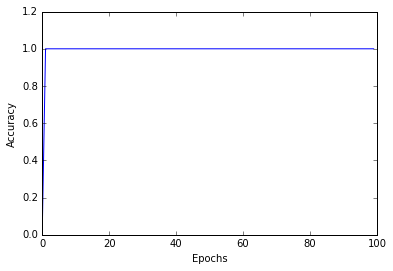

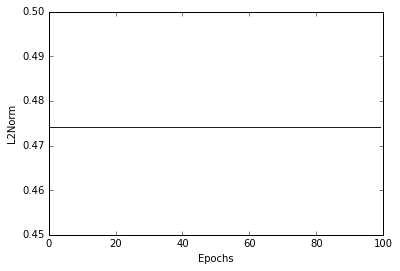

In [100]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas



class Perceptron:

    def __init__(self):
        #@wingate
        data = pandas.read_csv( 'Fisher.csv' )
        m = data.as_matrix()
        labels = m[:,0]
        labels[ labels==2 ] = 1  # squash class 2 into class 1
        self.labels = np.atleast_2d( labels ).T
        self.features = m[:,1:5]        
        
        self.weights = np.random.randn(self.features.shape[1])
        self.bias = 0.0
        self.learningRate = .01
        self.accuracy = 0.0

    def Threshold(self,Input):
        if ((np.dot(self.weights,Input) + self.bias) >= 0.0):
            return 1
        else:
            return 0

    def perceptronLearningRule(self,target,inputVector):
        result = self.Threshold(inputVector)
        
        for i in range(len(inputVector)):
            self.weights[i] += (self.learningRate*(target-result)*inputVector[i])
        
        self.bias += self.learningRate*(target-result)
        
        if result == target:
            self.accuracy += 1

            

#############################################################

per = Perceptron()


theAccuracy = []
theL2Norm = []

epoch = 100

#run for num epochs
for runs in range(epoch):
	per.accuracy = 0
	for i in range(len(per.features)):
		per.perceptronLearningRule(per.labels[i],per.features[i])
        
	theAccuracy.append(per.accuracy/len(per.features))
	theL2Norm.append(np.log(np.sqrt(np.dot(per.weights,per.weights))))

#plot Accuracy
plt.plot(theAccuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0,1.2])
plt.show()

#plot L2Norm
plt.plot(theL2Norm)
plt.xlabel("Epochs")
plt.ylabel("L2Norm")
plt.show()











Part 2, CIFAR

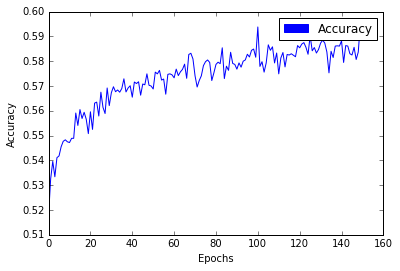

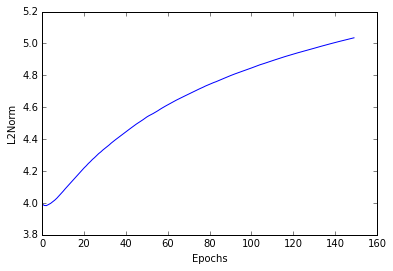

In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
import matplotlib.patches as mpatches


#@wingate    
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict


class Perceptron:

    def __init__(self):
        #@wingate
        data = unpickle( 'cifar-10-batches-py/data_batch_1' )
        self.features = data['data']
        
        self.labels = data['labels']
        self.labels = np.atleast_2d( self.labels ).T
 
        # squash classes 0-4 into class 0, and squash classes 5-9 into class 1
        self.labels[ self.labels < 5 ] = 0
        self.labels[ self.labels >= 5 ] = 1
        
        self.weights = np.random.randn(self.features.shape[1])
        self.bias = 0.0
        self.learningRate = .0001
        self.accuracy = 0.0

    def Threshold(self,Input):
        if ((np.dot(self.weights,Input) + self.bias) >= 0.0):
            return 1
        else:
            return 0

    def perceptronLearningRule(self,target,inputVector):
        result = self.Threshold(inputVector)
        
        self.weights += (self.learningRate*(target-result)*inputVector)      
        self.bias += self.learningRate*(target-result)
        
        if result == target:
            self.accuracy += 1

            

#############################################################

per = Perceptron()
epoch = 150

theAccuracy = np.empty(epoch)
theL2Norm = []

indx = 0

#run for num epochs
for runs in range(epoch):
    per.accuracy = 0
    for i in range(len(per.features)):
        per.perceptronLearningRule(per.labels[i],per.features[i])
    
    theAccuracy[indx] = (per.accuracy/float(len(per.features)))
    theL2Norm.append(np.log(np.sqrt(np.dot(per.weights,per.weights))))
    indx += 1
    
#plot Accuracy
plt.plot(theAccuracy)
blue_patch = mpatches.Patch(color='blue', label='Accuracy')
plt.legend(handles=[blue_patch])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

#plot L2Norm
plt.plot(theL2Norm)
plt.xlabel("Epochs")
plt.ylabel("L2Norm")
plt.show()




